**Importing required libraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

**Loading dataset**

In [18]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\pga24\Admission_Predict.csv")

In [19]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Info and data description**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                390 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               394 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [21]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,390.000000,400.000000,394.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.398718,3.452500,8.604873,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006725,0.898478,0.597596,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.172500,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.630000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.077500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Droping unwanted columns**

In [22]:
df = df.drop(['Serial No.'], axis=1)

**Checking null values in dataset**

In [23]:
df.isnull().sum()

GRE Score             0
TOEFL Score           0
University Rating     0
SOP                  10
LOR                   0
CGPA                  6
Research              0
Chance of Admit       0
dtype: int64

### Missing value treatment

In [24]:
df['SOP'].mean()

3.3987179487179486

In [25]:
df['SOP'].median()

3.5

In [26]:
df['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5, nan])

In [27]:
df['SOP'] = df['SOP'].fillna(3.5)

In [28]:
df['CGPA'].mean()

8.604873096446699

In [29]:
df['CGPA'].median()

8.629999999999999

In [30]:
df['CGPA'] = df['CGPA'].fillna(df['CGPA'].median())

In [31]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Exploratory Data Analysis

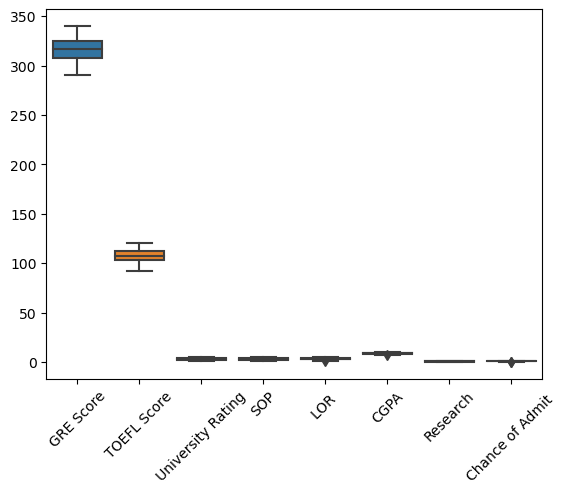

In [80]:
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

**Distribution of the variables of graduate applicants**

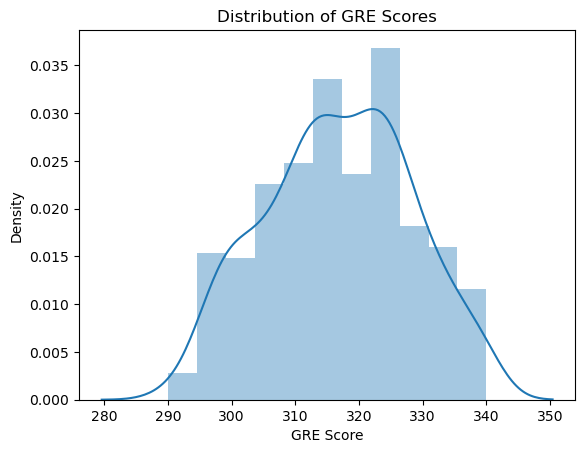

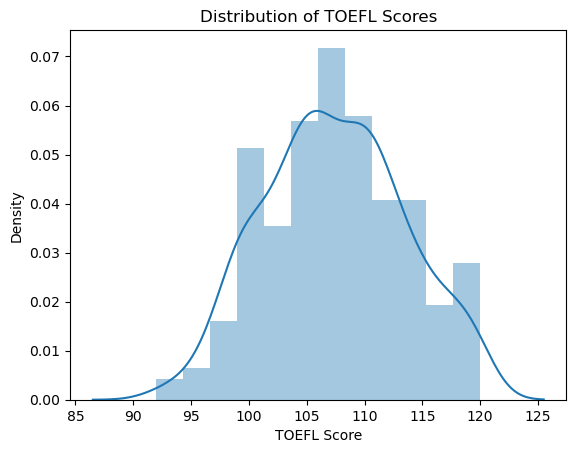

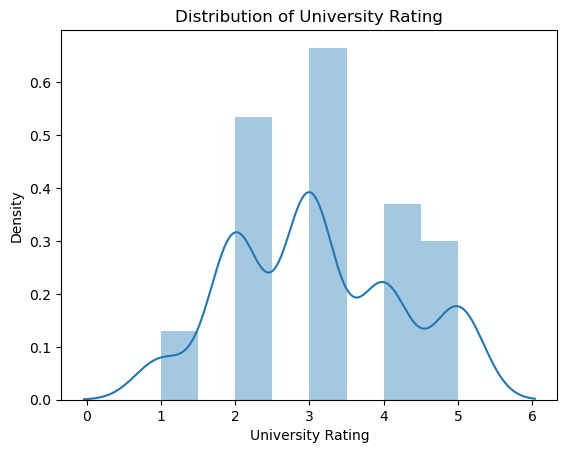

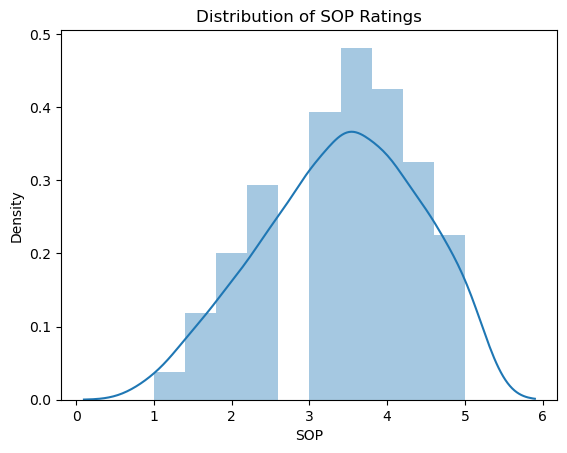

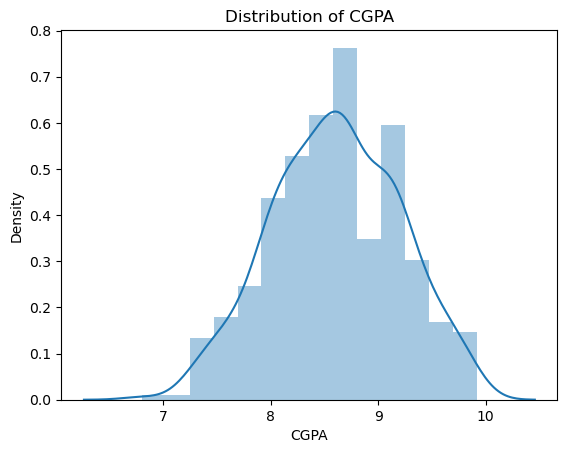

In [33]:
fig = sns.distplot(df['GRE Score'], kde=True)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=True)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=True)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=True)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=True)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

It is clear from the distributions, students with varied merit apply for the university.

**Understanding the relation between different factors responsible for graduate admissions**

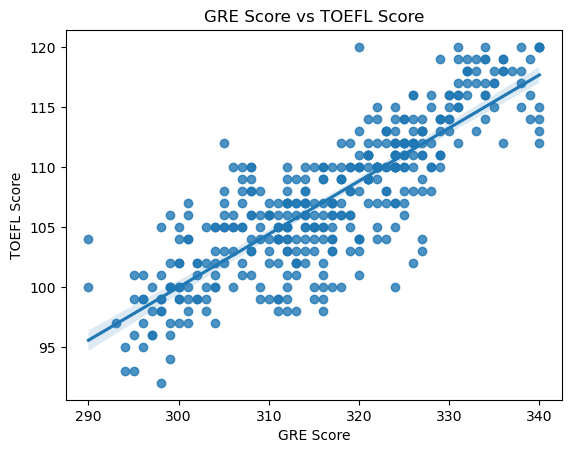

In [34]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

Person having higher GRE Scores also have higher TOEFL Scores

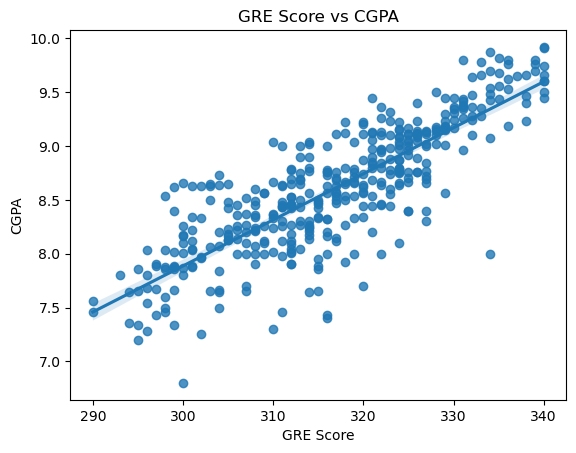

In [35]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

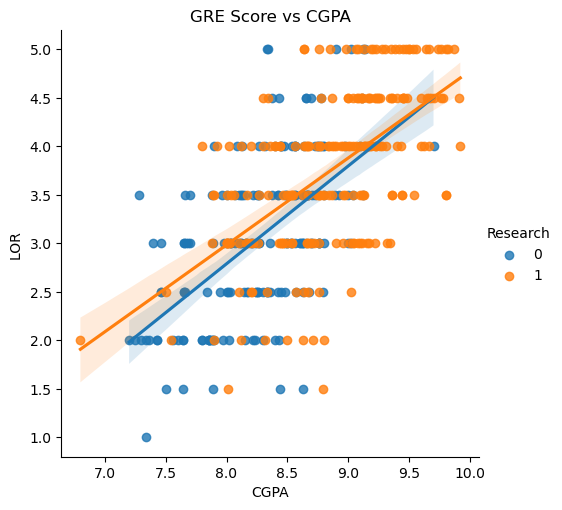

In [36]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence.

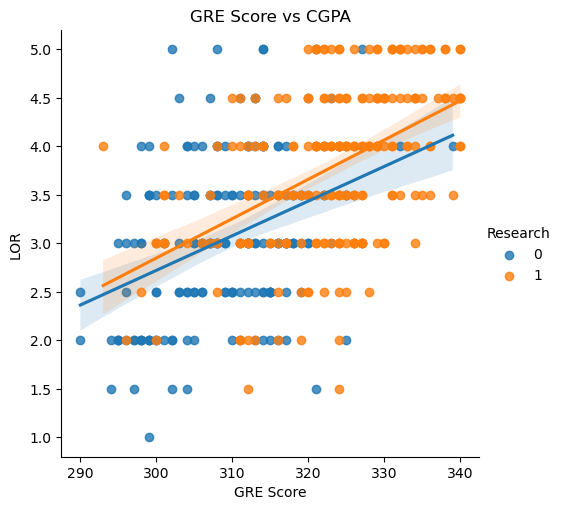

In [37]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not that related

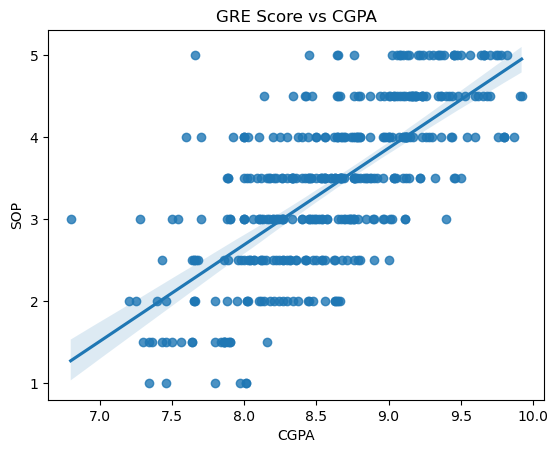

In [82]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

GRE Score and CGPA is only slightly related

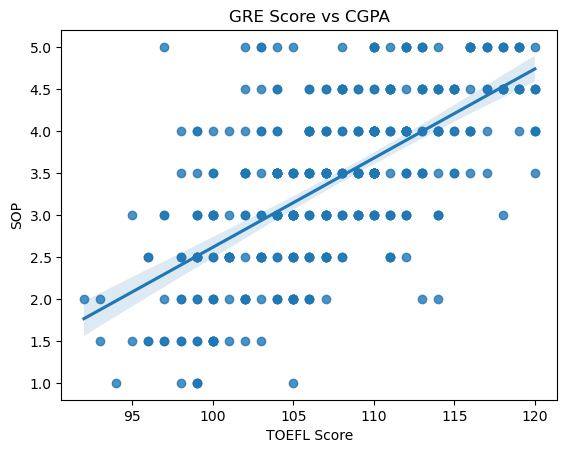

In [39]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

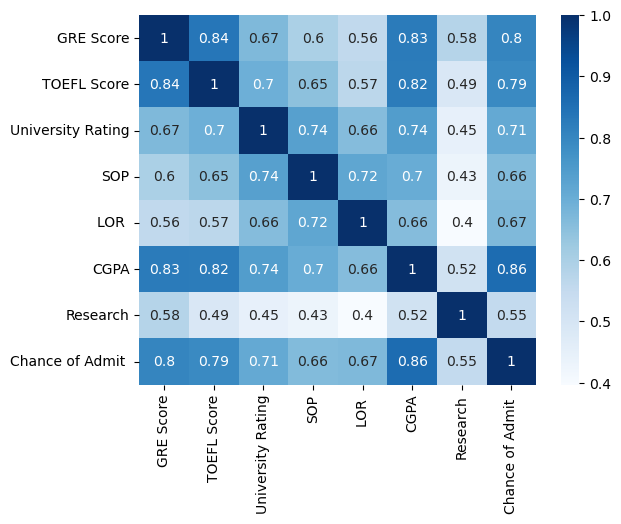

In [40]:
corr = df.corr()
sns.heatmap(corr, cmap='Blues',annot=True)
plt.show()

**Splitting the dataset with training and testing set**

In [41]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

## ML Model

In [44]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
y_pred

array([0.71155086, 0.72609021, 0.68037292, 0.59239593, 0.63875696,
       0.84651545, 0.55133213, 0.51863853, 0.78290758, 0.49306771,
       0.75915784, 0.60744309, 0.636079  , 0.73168269, 0.74218932,
       0.8464214 , 0.71377775, 0.94047506, 0.78885202, 0.78196288,
       0.69070055, 0.77222858, 0.63786713, 0.61897796, 0.45427525,
       0.50316227, 0.50603977, 0.41788232, 0.45769489, 0.61317757,
       0.69906295, 0.78593391, 0.61416427, 0.58293862, 0.52396644,
       0.65509972, 0.78717721, 0.60424047, 0.54861055, 0.63729288,
       0.7956336 , 0.8943043 , 0.92067615, 0.62875013, 0.74788677,
       0.82416505, 0.72795042, 0.51406521, 0.48885088, 0.5806239 ,
       0.60936926, 0.79908493, 0.92951472, 0.72378763, 0.56959768,
       0.53463269, 0.46217947, 0.47071996, 0.51186737, 0.6418721 ,
       0.76689351, 0.73441081, 0.82701414, 0.61843384, 0.95711629,
       0.97827495, 0.58893489, 0.62947995, 0.50600404, 0.73642736,
       0.61657387, 0.70444123, 0.82214035, 0.69201428, 0.84858

In [49]:
mae =mean_absolute_error(y_test, y_pred)
mse =mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [50]:
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root mean squared error',rmse)
print('R2 Score',r2)

Mean Absolute Error 0.04811687954285278
Mean Squared Error 0.0042953711559214946
Root mean squared error 0.06553908113424764
R2 Score 0.8062224006531706


In [52]:
print(model.coef_)

[ 0.00201595  0.00344883  0.00939715 -0.00517932  0.03075156  0.10057395
  0.01919454]


In [53]:
print(model.intercept_)

-1.282257703997462


In [54]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.feature_selection import SelectFromModel

### Linear Regression Model

In [83]:
lr_model=LinearRegression()
lr_scores=cross_val_score(lr_model,X_train, y_train,cv=5)

In [84]:
lr_model.fit(X_train,y_train)
lr_prediction = lr_model.predict(X_test)
lr_mae=mean_absolute_error(y_test,lr_prediction)
lr_mse=mean_squared_error(y_test,lr_prediction)
lr_r2=r2_score(y_test,lr_prediction)

In [85]:
print('Linear MAE',lr_mae)
print('Linear MSE',lr_mse)
print("Linear R2:", lr_r2)

Linear MAE 0.04811687954285278
Linear MSE 0.0042953711559214946
Linear R2: 0.8062224006531706


### Lasso Model

In [86]:
lasso_model=Ridge(alpha=1.0)
lasso_score=cross_val_score(lasso_model,X_train, y_train,cv=5)

In [87]:
lasso_model.fit(X_train,y_train)
lasso_prediction =lasso_model.predict(X_test)
lasso_mae =mean_absolute_error(y_test,lasso_prediction)
lasso_mse =mean_squared_error(y_test,lasso_prediction)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test,lr_prediction)

In [88]:
print('Lasso MAE',lr_mae)
print('Lasso MSE',lr_mse)
print("Linear R2:", lr_r2)

Lasso MAE 0.04811687954285278
Lasso MSE 0.0042953711559214946
Linear R2: 0.8062224006531706


### Ridge Model

In [89]:
ridge_model=Ridge(alpha=1.0)
ridge_score=cross_val_score(ridge_model,X_train, y_train,cv=5)

In [90]:
ridge_model.fit(X_train,y_train)
ridge_prediction =ridge_model.predict(X_test)
ridge_mae =mean_absolute_error(y_test,ridge_prediction)
ridge_mse =mean_squared_error(y_test,ridge_prediction)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test,ridge_prediction)

In [91]:
print('Ridge MAE',ridge_mae)
print('Ridge MSE',ridge_mse)
print('Ridge RMSE',ridge_rmse)
print('Ridge R2',ridge_r2)

Ridge MAE 0.04816926881651527
Ridge MSE 0.004306437063116166
Ridge RMSE 0.06562344903398606
Ridge R2 0.8057231830412485


### MM Estimator : HuberRegression

In [93]:
from sklearn.linear_model import HuberRegressor

In [98]:
huber_regressor = HuberRegressor(epsilon=1.35)
huber_regressor.fit(X_train, y_train)
huber_prediction = huber_regressor.predict(X_test)

In [99]:
huber_mae =mean_absolute_error(y_test,huber_prediction)
huber_mse =mean_squared_error(y_test,huber_prediction)
huber_rmse = np.sqrt(huber_mse)
huber_r2 = r2_score(y_test,huber_prediction)

In [100]:
print('Huber MAE:',huber_mae)
print('Huber MSE:',huber_mse)
print('Huber RMSE:',huber_rmse)
print('Huber R2:',huber_r2)

Huber MAE: 0.05077634194624177
Huber MSE: 0.004783304138012053
Huber RMSE: 0.06916143533799782
Huber R2: 0.7842102209184105


### M estimate

In [101]:
import statsmodels.api as sm

In [102]:
sm_model = sm.RLM(y_test, sm.add_constant(X_test), M=sm.robust.norms.HuberT())
results = sm_model.fit()
robust_coefficients = results.params
print("Robust Coefficients (Intercept, Slope):", robust_coefficients)

Robust Coefficients (Intercept, Slope): const               -1.361454
GRE Score            0.002076
TOEFL Score          0.005091
University Rating   -0.014709
SOP                  0.013289
LOR                  0.002036
CGPA                 0.100229
Research             0.049767
dtype: float64


### MM estimate : RANSAC regression

In [103]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

In [107]:
ransac = RANSACRegressor()
mm= ransac.fit(X_test, y_test)
mm_estimate_coeff = ransac.estimator_.coef_
mm_estimate_intercept = ransac.estimator_.intercept_
mm_prediction = ransac.predict(X_test)

In [108]:
print("MM Estimate Coefficients:", mm_estimate_coeff)
print("MM Estimate Intercept:", mm_estimate_intercept)

MM Estimate Coefficients: [ 0.00185957  0.00703216 -0.0199878   0.00127058  0.02211055  0.08838592
  0.05426824]
MM Estimate Intercept: -1.4147325165640345


In [109]:
mm_mae =mean_absolute_error(y_test,mm_prediction)
mm_mse =mean_squared_error(y_test,mm_prediction)
mm_rmse = np.sqrt(mm_mse)
mm_r2 = r2_score(y_test,huber_prediction)
print('mm mae:',mm_mae)
print('mm mse:',mm_mse)
print('mm rmse:',mm_rmse)
print('mm r2:',mm_r2)

mm mae: 0.040268731494808876
mm mse: 0.0034802214899283144
mm rmse: 0.05899340208810062
mm r2: 0.7842102209184105


### Lts estimate

In [110]:
from sklearn.linear_model import RANSACRegressor

In [111]:
ransac = RANSACRegressor()

ransac.fit(X_test, y_test)

lts_estimate_coeff = ransac.estimator_.coef_
lts_estimate_intercept = ransac.estimator_.intercept_

In [112]:
print("LTS Estimate Coefficients:", lts_estimate_coeff)
print("LTS Estimate Intercept:", lts_estimate_intercept)

LTS Estimate Coefficients: [ 0.00111283  0.00671542 -0.01167106 -0.00429434  0.01995339  0.10308344
  0.05470849]
LTS Estimate Intercept: -1.2688057057157294


In [113]:
lts_prediction = ransac.predict(X_test)
lts_mae =mean_absolute_error(y_test,lts_prediction)
lts_mse =mean_squared_error(y_test,lts_prediction)
lts_rmse = np.sqrt(lts_mse)
lts_r2 = r2_score(y_test,huber_prediction)
print('lts mae:',lts_mae)
print('lts mse:',lts_mse)
print('lts rmse:',lts_rmse)
print('lts r2:',lts_r2)

lts mae: 0.039861186104453536
lts mse: 0.0034217014667697215
lts rmse: 0.058495311493911385
lts r2: 0.7842102209184105


### S estimate

In [119]:
import statsmodels.api as sm

In [120]:
model = sm.RLM(y_test, X_test, M=sm.robust.norms.HuberT())

#Fit the model to the data
results = model.fit()

#Extract the S-estimate of coefficients
s_estimate_intercept = results.params[0]
s_estimate_coefficient = results.params[1]

In [121]:
print("S-estimate Intercept:", s_estimate_intercept)
print("S-estimate Coefficient:", s_estimate_coefficient)

S-estimate Intercept: -0.0027218907971177653
S-estimate Coefficient: 0.004041763136519078


In [122]:
s_prediction = results.predict(X_test)
s_mae =mean_absolute_error(y_test,s_prediction)
s_mse =mean_squared_error(y_test,s_prediction)
s_rmse = np.sqrt(s_mse)
s_r2 = r2_score(y_test,huber_prediction)
print('s mae:',s_mae)
print('s mse:',s_mse)
print('s rmse:',s_rmse)
print('s r2:',s_r2)

s mae: 0.047997613460230584
s mse: 0.004419510241063857
s rmse: 0.06647939711718102
s r2: 0.7842102209184105


### Theil sen regressor

In [123]:
from sklearn.linear_model import TheilSenRegressor

In [124]:
#Create a Theil-Sen estimator model
theil_sen = TheilSenRegressor()

#Fit the model to the data
theil_sen.fit(X_test, y_test)

TheilSenRegressor()

In [125]:
#Get the Theil-Sen estimate of the coefficients
theil_sen_estimate_intercept = theil_sen.intercept_
theil_sen_estimate_coefficient = theil_sen.coef_[0]
print("Theil-Sen Estimate Intercept:", theil_sen_estimate_intercept)
print("Theil-Sen Estimate Coefficient:", theil_sen_estimate_coefficient)

Theil-Sen Estimate Intercept: -1.4050665268488218
Theil-Sen Estimate Coefficient: 0.0018490373403316387


In [126]:
ts_prediction = theil_sen.predict(X_test)
ts_mae =mean_absolute_error(y_test,ts_prediction)
ts_mse =mean_squared_error(y_test,ts_prediction)
ts_rmse = np.sqrt(ts_mse)
ts_r2 = r2_score(y_test,ts_prediction)
print('ts mae:',ts_mae)
print('ts mse:',ts_mse)
print('ts rmse:',ts_rmse)
print('ts r2:',ts_r2)

ts mae: 0.040887127234973696
ts mse: 0.003278940347110012
ts rmse: 0.057262032334785426
ts r2: 0.8520767668729835
